## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import h2o
import warnings
warnings.filterwarnings('ignore')
from h2o.automl import H2OAutoML
import os


## Set Java environment explicitly if needed (adjust path if required)

In [2]:
os.environ['JAVA_HOME'] = r'C:\Program Files\jdk-17.0.0.1'
os.environ['PATH'] = os.environ['JAVA_HOME'] + r'\bin;' + os.environ['PATH']


## Load data

In [3]:

df = pd.read_csv(r"C:\Users\USER\Downloads\engine_data.csv (1)\engine_data.csv")
print(df.head())


   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Engine Condition  
0     84.144163     81.632187                 1  
1     77.640934     82.445724                 0  
2     77.752266     79.645777                 1  
3     74.129907     71.774629                 1  
4     78.396989     87.000225                 0  


In [4]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB
None
         Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       

In [5]:
df.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [6]:
target = "Engine Condition"
print(df[target].value_counts())

Engine Condition
1    12317
0     7218
Name: count, dtype: int64


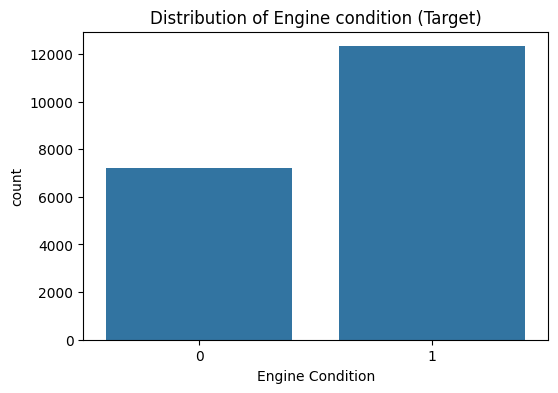

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=target)
plt.title("Distribution of Engine condition (Target)")
plt.show()

In [8]:

print("Missing values:\n", df.isnull().sum())

Missing values:
 Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64


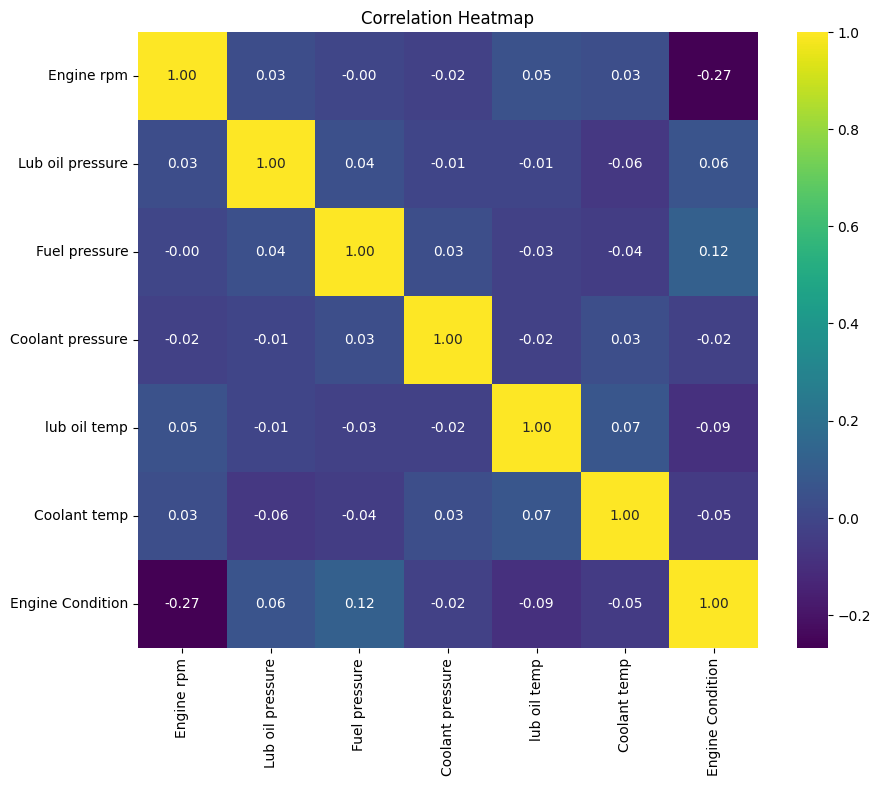

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
target = 'Engine Condition'
X = df.drop(columns=[target])
y = df[target]

## Train test split with stratify to preserve distribution

In [11]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

## Initialize H2O

In [12]:
h2o.init(max_mem_size="4G", nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 17.0.0.1+2-3, mixed mode, sharing)
  Starting server from C:\Users\USER\miniconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\USER\AppData\Local\Temp\tmpyldado42
  JVM stdout: C:\Users\USER\AppData\Local\Temp\tmpyldado42\h2o_USER_started_from_python.out
  JVM stderr: C:\Users\USER\AppData\Local\Temp\tmpyldado42\h2o_USER_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 24 days
H2O_cluster_name:,H2O_from_python_USER_89h3u0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


## Convert to H2O Frames

In [13]:
train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test_h2o = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [14]:
train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test_h2o = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [15]:
train_h2o[target] = train_h2o[target].asfactor()
test_h2o[target] = test_h2o[target].asfactor()


In [16]:
features = X_train.columns.tolist()

In [17]:
features

['Engine rpm',
 'Lub oil pressure',
 'Fuel pressure',
 'Coolant pressure',
 'lub oil temp',
 'Coolant temp']

## Run H2O AutoML

In [18]:
aml = H2OAutoML(max_runtime_secs=600, seed=1, nfolds=5, balance_classes=True)
aml.train(x=features, y=target, training_frame=train_h2o)

AutoML progress: |
15:23:27.393: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),17/43
# GBM base models (used / total),10/25
# DeepLearning base models (used / total),6/15
# GLM base models (used / total),0/1
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [19]:
print("\n----- Leaderboard -----")
print(aml.leaderboard.head())


----- Leaderboard -----
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_4_AutoML_1_20250921_152327     0.702906   0.596388  0.799668                0.463927  0.453717  0.205859
StackedEnsemble_AllModels_3_AutoML_1_20250921_152327     0.702338   0.596671  0.799334                0.458951  0.453862  0.205991
StackedEnsemble_BestOfFamily_4_AutoML_1_20250921_152327  0.701915   0.596976  0.798228                0.452412  0.453937  0.206059
GBM_grid_1_AutoML_1_20250921_152327_model_2              0.701149   0.597761  0.797303                0.464813  0.454248  0.206341
GBM_grid_1_AutoML_1_20250921_152327_model_7              0.700995   0.600045  0.79735                 0.450043  0.455164  0.207175
StackedEnsemble_AllModels_2_AutoML_1_20250921_152327     0.700852   0.597716  0.798508                0.457455  0.454349  0.206433
GBM_grid_1_AutoML_1_20250921_152327_model_17             0

In [20]:

print("\nBest model:", aml.leader)


Best model: Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_4_AutoML_1_20250921_152327


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       17/43
# GBM base models (used / total)           10/25
# DeepLearning base models (used / total)  6/15
# GLM base models (used / total)           0/1
# DRF base models (used / total)           1/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.1899376488750478
RMSE: 0.43581836683995756
LogLoss: 0.5589695152136978
AUC: 0.7634139876146723
AUCPR: 0.8434394964932166

In [21]:

preds = aml.leader.predict(test_h2o)
pred_labels = preds.as_data_frame()['predict']

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


## Evaluation

In [22]:

print("\n----- Classification Report -----")
print(classification_report(y_test, pred_labels))


----- Classification Report -----
              precision    recall  f1-score   support

           0       0.69      0.09      0.17      1444
           1       0.65      0.98      0.78      2463

    accuracy                           0.65      3907
   macro avg       0.67      0.53      0.47      3907
weighted avg       0.66      0.65      0.55      3907



In [23]:
accuracy = accuracy_score(y_test, pred_labels)
roc_auc = roc_auc_score(y_test, preds.as_data_frame()['p1']) 

In [24]:
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.6496
ROC AUC Score: 0.7048


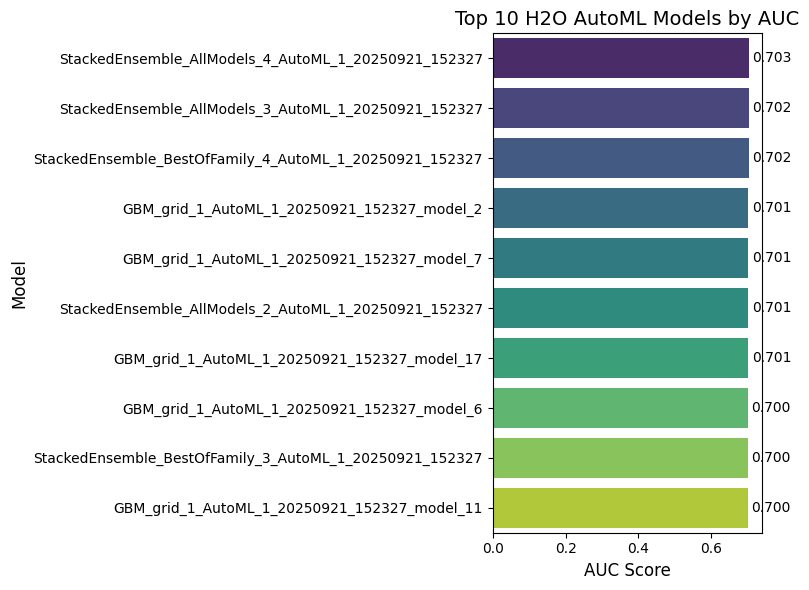

In [25]:


# Get leaderboard as pandas dataframe
lb = aml.leaderboard.as_data_frame()

# Sort by AUC (descending) and pick top N models
N = 10
top_lb = lb.sort_values(by='auc', ascending=False).head(N)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x='auc', 
    y='model_id', 
    data=top_lb,
    palette='viridis'
)
plt.title('Top 10 H2O AutoML Models by AUC', fontsize=14)
plt.xlabel('AUC Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

# Add AUC values as text labels beside bars
for i, (auc, model) in enumerate(zip(top_lb['auc'], top_lb['model_id'])):
    ax.text(auc + 0.01, i, f"{auc:.3f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [26]:
h2o.shutdown(prompt=False)

H2O session _sid_a397 closed.


## Conclusion

#### 1) The major models identified by H2O AutoML from the leaderboard represent strong candidates for further improvement. 
#### 2) Fine-tuning these top-performing models—through targeted hyperparameter tuning, additional feature engineering, or extended training—can enhance           their predictive accuracy and robustness. 
#### 3) Leveraging these models as a starting point ensures an efficient iterative approach to optimize performance, rather than building separate models          from scratch.

